In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Exchange rate between USD and YEN

# Exchange rate data visualization(line chart) 1990 - 2000

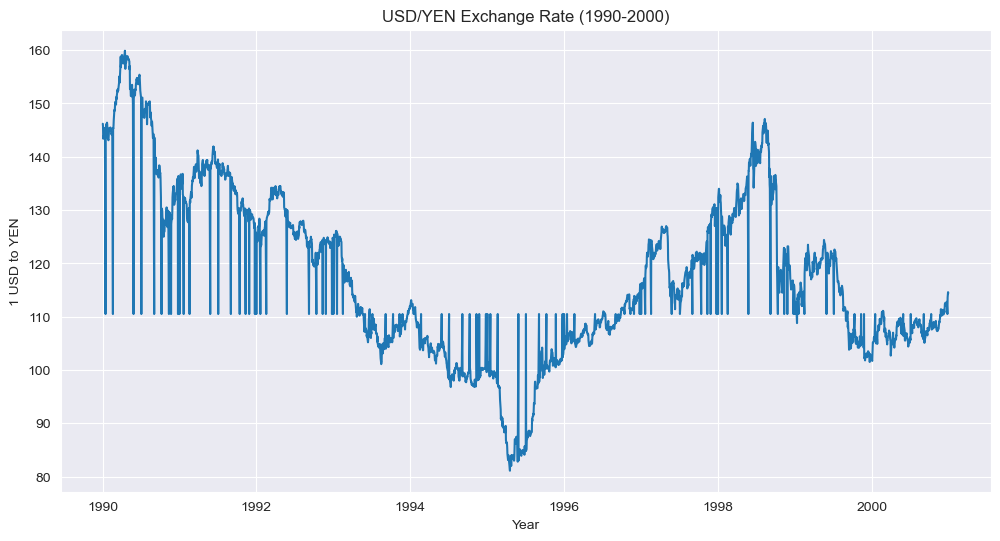

In [44]:


# read in the CSV file
exchange = pd.read_csv("DEXJPUS.csv")

# convert dates column to datetime type
exchange['Date'] = pd.to_datetime(exchange['Date'])

# create a new column for year
exchange['year'] = exchange['Date'].dt.year

# create three separate dataframes for the three periods
exchange_1990_2000 = exchange[(exchange['year'] >= 1990) & (exchange['year'] <= 2000)]
exchange_2000_2010 = exchange[(exchange['year'] > 2000) & (exchange['year'] <= 2010)]
exchange_2010_2023 = exchange[(exchange['year'] > 2010) & (exchange['year'] <= 2023)]

# plot the data for 1990-2000
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="Date", y="Value", data=exchange_1990_2000, ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("1 USD to YEN")
ax.set_title("USD/YEN Exchange Rate (1990-2000)")
plt.show()

# narrowing our range from 2000 to 2023

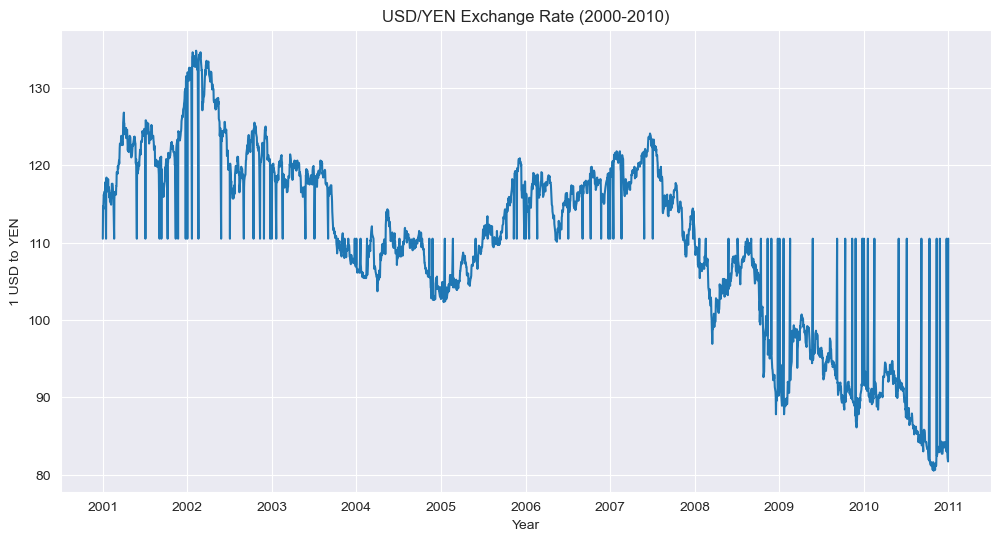

In [45]:
# plot the data for 2000-2010
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="Date", y="Value", data=exchange_2000_2010, ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("1 USD to YEN")
ax.set_title("USD/YEN Exchange Rate (2000-2010)")
plt.show()

# 10 years exchange rate graph

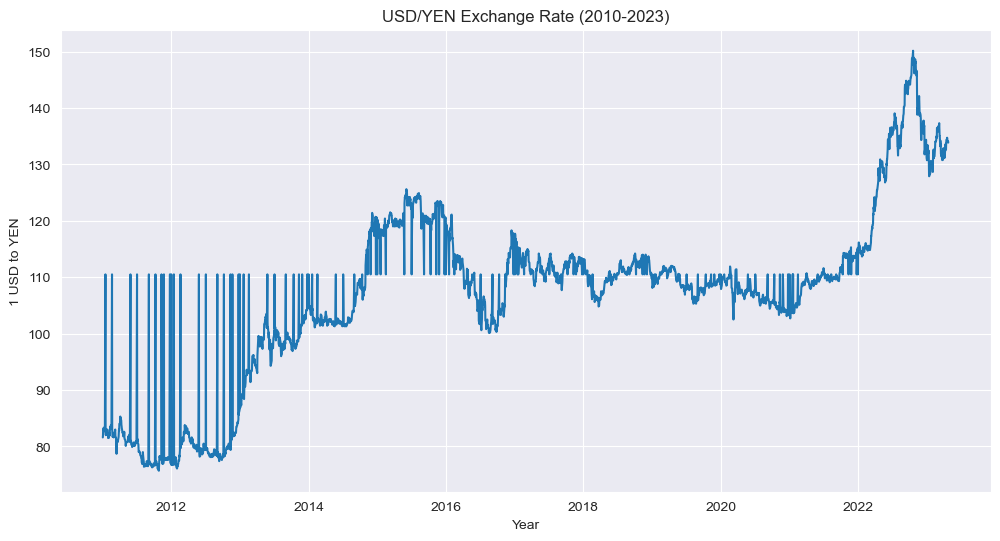

In [46]:
# plot the data for 2010-2023
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x="Date", y="Value", data=exchange_2010_2023, ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("1 USD to YEN")
ax.set_title("USD/YEN Exchange Rate (2010-2023)")
plt.show()

# purchasing power parity value visualization

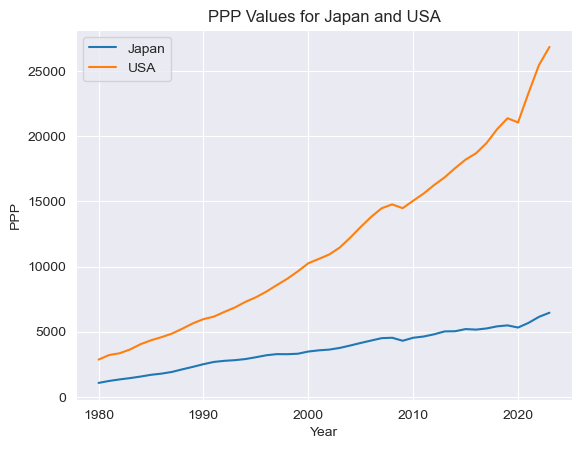

In [8]:
#read ppp value from csv
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV files
df_jp = pd.read_csv("PPP_JP.csv")
df_us = pd.read_csv("PPP_US.csv")

# Extract years and PPP values for Japan
years_jp = df_jp["Year"]
ppp_values_jp = df_jp["PPP"]

# Extract years and PPP values for USA
years_us = df_us["Year"]
ppp_values_us = df_us["PPP"]

# Create line chart with multiple lines
plt.plot(years_jp, ppp_values_jp, label="Japan")
plt.plot(years_us, ppp_values_us, label="USA")
plt.xlabel("Year")
plt.ylabel("PPP")
plt.title("PPP Values for Japan and USA")
plt.legend()
plt.show()


# GDP value (US vs JPN)

In [50]:
us_df = pd.read_csv('GDP.csv')
us_df

,DATE,GDP
0,1994-01-01,7115.652
1,1994-04-01,7246.931
2,1994-07-01,7331.075
3,1994-10-01,7455.288
4,1995-01-01,7522.289
...,...,...
111,2021-10-01,24349.121
112,2022-01-01,24740.480
113,2022-04-01,25248.476
114,2022-07-01,25723.941


In [51]:
jp_df = pd.read_csv('JP_GDP.csv')
jp_df

,DATE,GDP
0,1994-01-01,446276.5
1,1994-04-01,443822.8
2,1994-07-01,448928.5
3,1994-10-01,447124.9
4,1995-01-01,452096.3
...,...,...
111,2021-10-01,544376.8
112,2022-01-01,541843.6
113,2022-04-01,548075.3
114,2022-07-01,546607.5


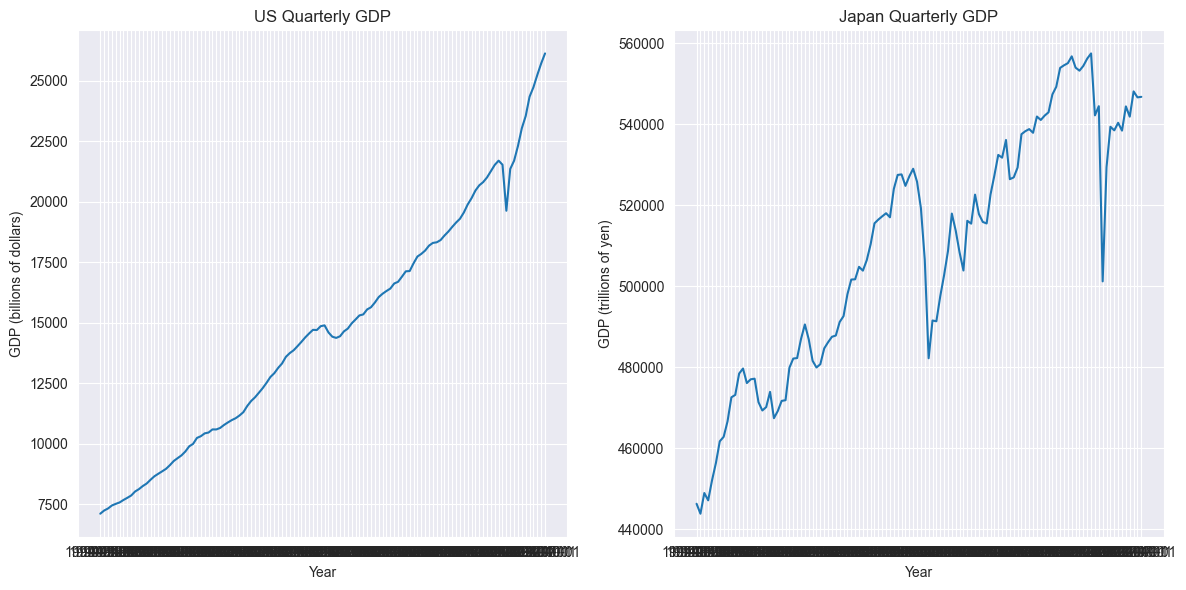

In [52]:
# create two separate line plots side by side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# plot US GDP data
sns.set_style("darkgrid")
sns.lineplot(x="DATE", y="GDP", data=us_df, ax=axs[0])
axs[0].set_xlabel("Year")
axs[0].set_ylabel("GDP (billions of dollars)")
axs[0].set_title("US Quarterly GDP")

# plot Japan GDP data
sns.set_style("darkgrid")
sns.lineplot(x="DATE", y="GDP", data=jp_df, ax=axs[1])
axs[1].set_xlabel("Year")
axs[1].set_ylabel("GDP (trillions of yen)")
axs[1].set_title("Japan Quarterly GDP")

# display plots
plt.tight_layout()
plt.show()

In [68]:
merged_gdp = pd.merge(jp_df, us_df, on='DATE')
merged_gdp = merged_gdp.rename(columns = {'DATE':'Date','GDP_x':'US_GDP', 'GDP_y':'JPN_GDP'},inplace = False)
merged_gdp['gdp_JP:US'] = merged_gdp['JPN_GDP'] / merged_gdp['US_GDP']
merged_gdp

,Date,US_GDP,JPN_GDP,gdp_JP:US
0,1994-01-01,446276.5,7115.652,0.015944
1,1994-04-01,443822.8,7246.931,0.016328
2,1994-07-01,448928.5,7331.075,0.016330
3,1994-10-01,447124.9,7455.288,0.016674
4,1995-01-01,452096.3,7522.289,0.016639
...,...,...,...,...
111,2021-10-01,544376.8,24349.121,0.044728
112,2022-01-01,541843.6,24740.480,0.045660
113,2022-04-01,548075.3,25248.476,0.046068
114,2022-07-01,546607.5,25723.941,0.047061


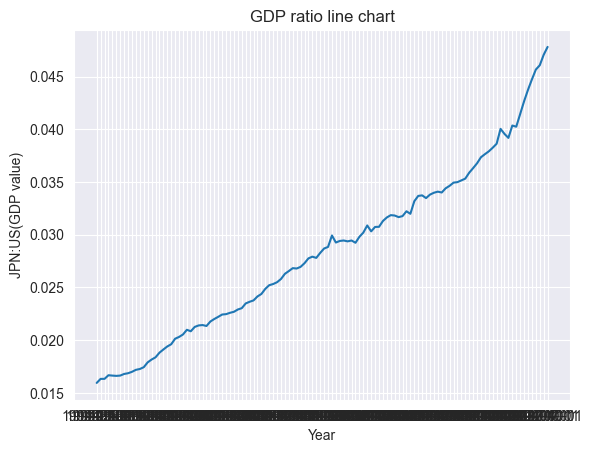

In [70]:
#read GDP ratio value into list
gdp_ratio = list(merged_gdp['gdp_JP:US'])
year = list(merged_gdp['Date'])
#plotting in data
plt.plot(year,gdp_ratio)
plt.xlabel("Year")
plt.ylabel("JPN:US(GDP value)")
plt.title("GDP ratio line chart")
plt.show()